# Abstract

# Table of contents
1. [Introduction](#introduction)
2. [Related Work](#related)
3. [Theory](#theory)

    3.1. [Conditional Copy Mechanism](#copy)
    
    3.2. [Encoder - Decoder Architecture](#encoderdecoder)
    
    3.3. [Hierachical Encoder - Decoder](#hierachy)
    
4. [Concept](#concept)
5. [Experimental Setup](#experiment)
6. [Conclusion](#results)
7. [Outlook](#conclusion)

   [References](#references)


# 1 Introduction <a name="introduction"></a>

The expertise of machines to handle complex data already outmatches humans in many regards. In the area of Data Science, processing of the aforementioned data using tools based on machine learning methods became a key component in the repertoire of most data scientists.
But while even primitive machines can handle clear and well-structured data, humans outmatched machines for longer in one important part - dealing with and handling natural language data - this subdiscipline of data sciences was arduous and slow, therefore only allowing small datasets to yield desirable results.

The fields of *Natural Language Processing* (NLP) and *Natural Language Generation* (NLG) are key to unlocking the huge amount of data locked behind the natural language barrier, using the benefits of machine learning to its fullest. Maintaining the ability of machines to deal with massive quantities of data way more efficiently than a human, it adds capabilities that traditionally only a human component could provide to the machine to get more natural results.

*Natural language processing* dates back to the time of the first digital computers - a famous example is Warren Weaver, whose efforts of code decoding were mainly during World War II, but he then repurposed his skills to peacetime uses, seeing different languages as codes that could be automatically decoded by machines one day [[1]](#historyOfNLP).
Natural language processing enables the machine to get the data it needs for in depth analysis out of - on first glance - unstructured languages and the possibility to learn from *human* generated text to improve itself for more natural *machine* generated text.

*Natural language generation* is a more recent technology - most prominently used in chatbots, it found its way into the toolkits of data scientists and linguists alike. From 2014 until 2017 job possibilities in natural language generation and deep learning grew from a negligible number to a solid 41,000 jobs - a significant increase which can be linked to a higher demand in these diciplines. 
 [[2]](#gartner)

An important use of *natural language generation* is the so called *data-to-text* generation- it is used to mimic human writing and text, based on the data a human author normally would base his or her text on. The most used example in research for this comes from RotoWire, a fantasy sports website which contains the statistics of match outcomes of many different sports plus journalistic descriptions of the mentioned matches e.g. from NBA basketball [[3]](#rotowire).


 <!-- //Data-to-text generation models have two things that need to be considered carefully: -->
This matching, existing dataset of data-to-text made by humans is a welcome basis for machine learning to teach the task to a machine. With an *encoder - decoder* system the RotoWire datasets can be "translated" into seemingly human written texts.[[4]](#hierarchical2019)
An *encoder* acts as a combinational circuit in which a dataset, our match statistics, will be encoded into vector form with the corresponding algorithm while a *decoder* reverts this process, from the encoded data vector back to "human" data format, our written match description.

Designing data-to-text models gives rise to two main challenges:
1) understanding structured data and 2) generating associated descriptions. 

Referring to the work of Clément Rebuffel et al. in their work *A Hierarchical Model for Data-to-Text
Generation* [[5]](#main) we will use their approach to improve the most used encoder-decoder architecture [[6]](#align2014), where the data structure is, as previously, encoded to a sequence of fixed-size vectors, a representation which can then be decoded using attention and a bi-LSTM.
For improvements on the simple encoder-decoder we will use a hierarchial approach for the attention generation, which focuses on the inherent data-structure to encode, but with a classical decoder approach as found in previous works. [[7]](#Data2Document)

Overall following adaptions and improvements will be made: 

- The basic encoder structure will be following a two-level architecture design by first encoding all the entities based on their elements respecting each others context using the transformer and after that encoding the encoded entities of a whole match on the same basis
- A Transformer encoder will be used in the data-to-text model to provide a stable encoding of each record inside an entity and each entity inside the whole data structure, observing context through the attention mechanism but unaffected by order
- An additional hierarchical attention mechanism to compute a hierarchical dynamic context will be added to feed into the decoder 


The experimental setup will be using data from the RotoWire benchmark which contains 4853 tables with stats of NBA games with matching human made descriptions. This model will be compared to several state of the art approches using BLEU score.


# 2 Related Work <a name="related"></a>

*Data-to-Text Generation on the RotoWire Dataset* is the simplest way to describe what will be reviewed in the scope of this work. There are multiple approaches to yield more precise results from this dataset in the data-to-text research field. 

The first approach as described by Sam Wiseman et al. [[7]](#Data2Document) is based on an encoder-decoder + conditional copy system published in 2017 and achieved good results, but still lacked in accuracy.

One year later *Data-to-Text Generation with Content Selection and Planning* by Ratish Puduppully et al. [[8]](#SelectionAndPlanning) also used data-to-text generation based on the RotoWire dataset, adding Neural Content Planning to get more accurate results. 

In 2019 Puduppully et al. improved on their work with *Entity Modeling* [[22]](#entityModeling) by creating specific entity representations to create the match descriptions with.

Shortly after, Clément Rebuffel et al. [[5]](#main) got back to the first approach of a conditional copy encoder-decoder architecture but enhanced it with a hierarchical attention transformer encoder to yield the most precise results. [[9]](#d2tRotowire)

In the following table the three different approaches are being compared using BLEU scores to gauge the precision of their results.

- Encoder-decoder + conditional copy approach in the work _Challenges in Data-to-Document Generation_: **74.80%** in **2017**
- Neural Content Planning + conditional copy in the work _Data-to-Text Generation with Content Selection and Planning_: **87.47%** in **2018**
- Hierarchical Transformer Encoder + conditional copy in the work _A Hierarchical Model for Data-to-Text Generation_: **89.46%** in **2019**
 [[9]](#d2tRotowire)
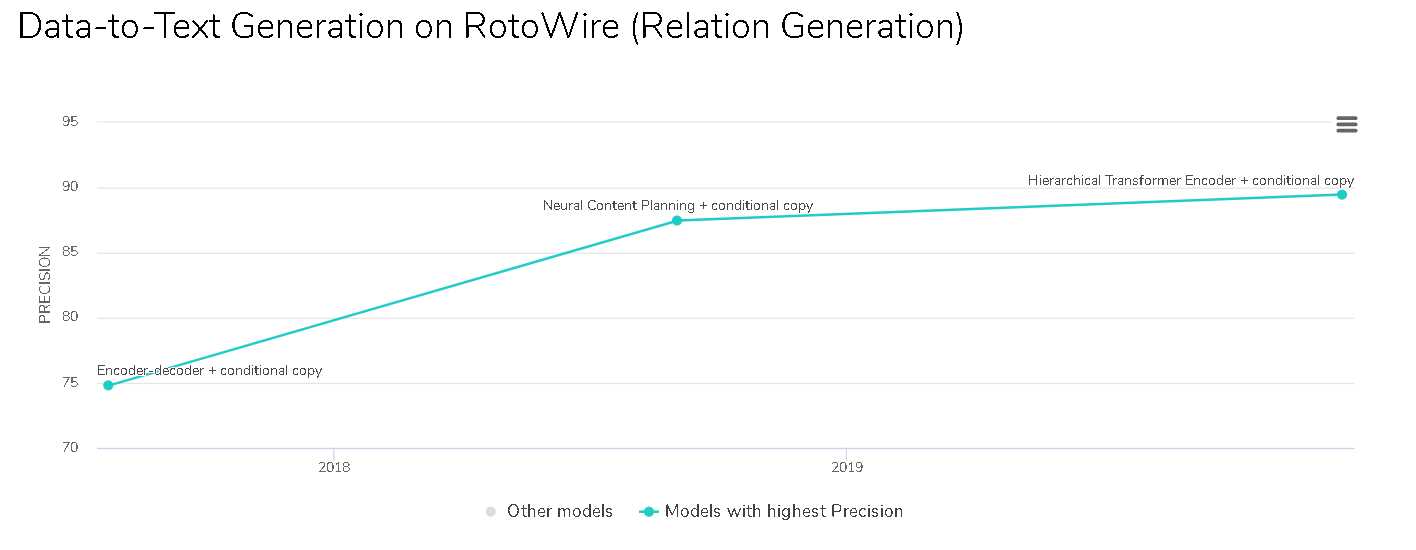
 [[9]](#d2tRotowire)
 
Other RotoWire independent approaches working with similar techniques are also based on a conditional copy system. *Neural Text Generation from Structured Data with Application to the Biography Domain* by Lebret et al. in a work related to the Facebook AI research [[10]](#structuredData2016) uses a copy system in a concept-to-text approach. They work with a dataset of per person statistics on Wikipedia and generate a biographical text description.

Other works in data-to-text generation rely on diverse architectures such as T5-Base and GCN EC and many more with a good BLEU score [[11]](#d2tWebNLG). 

For our work we will use a conditional copy mechanism which proved itself as a key component for working with complex data sets with rare words that dont need translation, such as the player names in our RotoWire data.

Furthermore we will explain the transformer encoders and hierarchical encoding system as in *A Hierarchical Model for Data-to-Text Generation* mentioned earlier before which yields the best results.


# 3 Theory <a name="theory"></a>
In this section we will focus on the required technologies used for the most efficient approach to make a data-to-text system.
We will follow the techniques that Clément Rebuffel et al. [[5]](#main) used in their work.

## 3.1 Conditional Copy Mechanism <a name="copy"></a>
The _Conditional Copy Mechanism_ is used on text input in all three mentioned papers that work with the RotoWire dataset, as does the concept-to-text approach in *Neural Text Generation from Structured Data with Application to the Biography Domain* by Lebret et al. [[10]](#structuredData2016). It removes unnecessary encoding and decoding for text that stays the same independent of wether is used in a text field of our data structure or in plain text. In our case, player names that are repeatedly used in the match descriptions can be replaced by a pointer that references the name, offloading the learning of abstract player names that would otherwise need to be done by the following encoder network.

Caglar Gulcehre et al. developed a conditional copy mechanism in their work _Pointing the Unknown Words_ [[12]](#pointing), calling it the pointer softmax method.

In the graphic below we can see how the conditional copy method uses its ability to prevent unnecessary encoding by identifying the words not usually found in a vocabular dictionary.

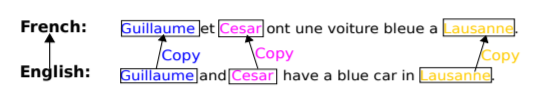
[[12]](#pointing)

After gaining understanding of this first method we can evaluate further important machine learning techniques required for this work.

## 3.2 Encoder - Decoder Architecture <a name="encoderdecoder"></a>
The origin of the Encoder - Decoder Architecture can be traced back to basic codec framework approaches, common use cases are: [[13]](#transformerExplanation)

- "The auto encoding of unsupervised algorithm is designed by using encoding decoding structure."

- "The application of image caption is also based on the coding decoding framework of cnn-rnn."

- "The NMT model of neural network machine translation is the encoding decoding framework of LSTM-LSTM." [[13]](#transformerExplanation)

As mentioned above, these approaches are only example use cases of the general framework and less our exact concept, as they are constantly extended and improved by multiple techniques, in our case especially the Transformer Encoder with its attention-mechanism and the hierarchical encoding. 

Encoder-Decoder works as a _seq2seq_ (sequence to sequence) approach, which simply means that one input sequence is processed as to one output sequence, concluding a one-to-one relation. Because of the double encoding on both low- and high-level, it can be imagined as a sort of nested encoding, where the sub elements are encoded on the micro scale and the overarching data structure is encoding the encoded sub elements on the macro scale.

### Encoder - Decoder Problem
<!--I dont know what this thing really does, hard to google for it-->
An issue regarding the Encoder-Decoder Architecture is the fixed-length vector representing our "memory" from one item to the next, which is however only caused by the RNN solution rather than by the encoder-decoder problem itself.
The middle vector used for the encoding of context has a fixed length regardless of the input length, which is no problem for shorter sentences but for better natural language generation we need the possibility to deal with variable, longer and more complex sentences. This can also cause loss of information due to limited data storing capabilities [[13]](#transformerExplanation).
While LSTM has a gating mechanism which partly deals with this issue a more specialized approach was needed.
 
### Vanishing Gradients Problem
One big problem of the deep or recurrent networks often used in Encoder-Decoder Architectures is vanishing (or exploding) gradients. They appear when a system with many layers is trained with gradient based learning and backpropagation. Long term dependencies are iterated upon again and again until small weights create a vanishing gradient towards zero and weights above 1 create an exploding gradient. The problem comes from repeated iteration with matrices that have an eigenvalue magnitude below (or above) 1, which can be somewhat mitigated by implementing specific eigenvalue normalized matrices [[14]](#eigenvalue) or long short-term memory (LSTM) RNNs. LSTMs add a memory cell and explicit gates to control information flow and have been successfully used in speech recognition and other seq2seq problems. 
[[15]](#vanishingGradients) 
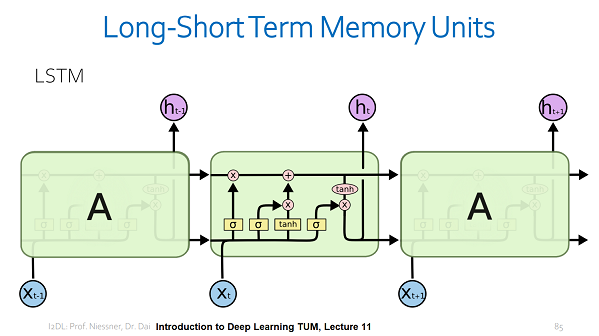

### Attention Mechanism
The _Attention Mechanism_ is a system alleviating the previous issues while working with an Encoder - Decoder framework.
It attempts to solve the issue of data loss due to continuous compression down to the length of the middle vector, while also helping with the Vanishing Gradient Problem by removing the iterative information gathering and replacing it with a more intentional process of choosing the most relevant context data.
The functionality of the attention mechanism is comparable to a human scanning text while reading, only quickly skimming filler words and empty phrases, focusing on the most relevant and defining words/features of the text to comprehend each word. For example bundling information regarding a location when reading a location-related word, so a "there" can be filled with a previously mentioned location or translation to other languages can restructure several expressions into one to fit the different grammar. This allows our seq2seq approach to utilize the most relevant contextual information for his decision process, by first encoding every item in our data and then estimating the relevancy of all other items for each individual item.
This system can also be used on different scales of a data structure, for example the word and the sentence level in *Hierarchical Attention Networks for Document Classification* [[16]](#hierarchicalAttentionClassification).

### Transformers
A recent development evolving the concept of attention are Transformers, similar to RNNs in functionality, but using attention to handle sequential data. Unlike the LSTM or other RNN implementations using recurrence or convolution, the data does not need to be encoded sequentially, allowing huge performance boosts through parallelization of the whole process. 

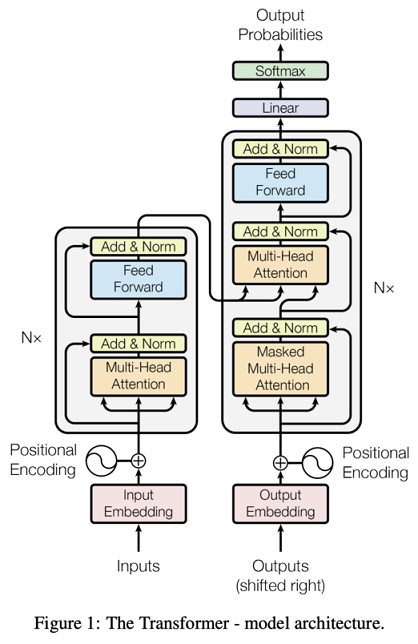
The encoder consists of 6 layers, each with a sublayer of multi-head self-attention followed by a feed-forward network.
In each of the attention layers, all of the previous layer outputs can be used.
Since this also means the input is practically unordered, additional positional encoding parameters are added as sine and cosine functions of different frequencies "at the bottoms of the encoder and decoder stacks"[[page 6, 17]](#attention2017).

Similarly, the decoder has the same 6 layers, but with a third sublayer added, which feeds in multi-head attention of the encoder output directly[[page 3, 17]](#attention2017). Masked multi-headed attention in the first decoder layer acts as a form of teacher forcing, created by masking the embedded output to only include previous words for the translation of each other word, similar to conventional seq2seq teacher forcing.

## 3.3 Hierachical Encoder - Decoder <a name="hierachy"></a>
Hierarchical Encoder - Decoder methods have been developed for a number of problems, e. g. [[19]](#HierarchicalLatent) or [[16]](#hierarchicalAttentionClassification), where not just the complete sequence is encoded all at once, instead encoding also happens on low-level smaller entities inside that sequence.
For Serban et al. the hierarchy is used to generate dialogues with more depth using a "hierarchical latent variable neural network architecture,
called VHRED"[page 6, [19]](#HierarchicalLatent) , while Yang et al. use encoding on the word and sentence level for document classification. 
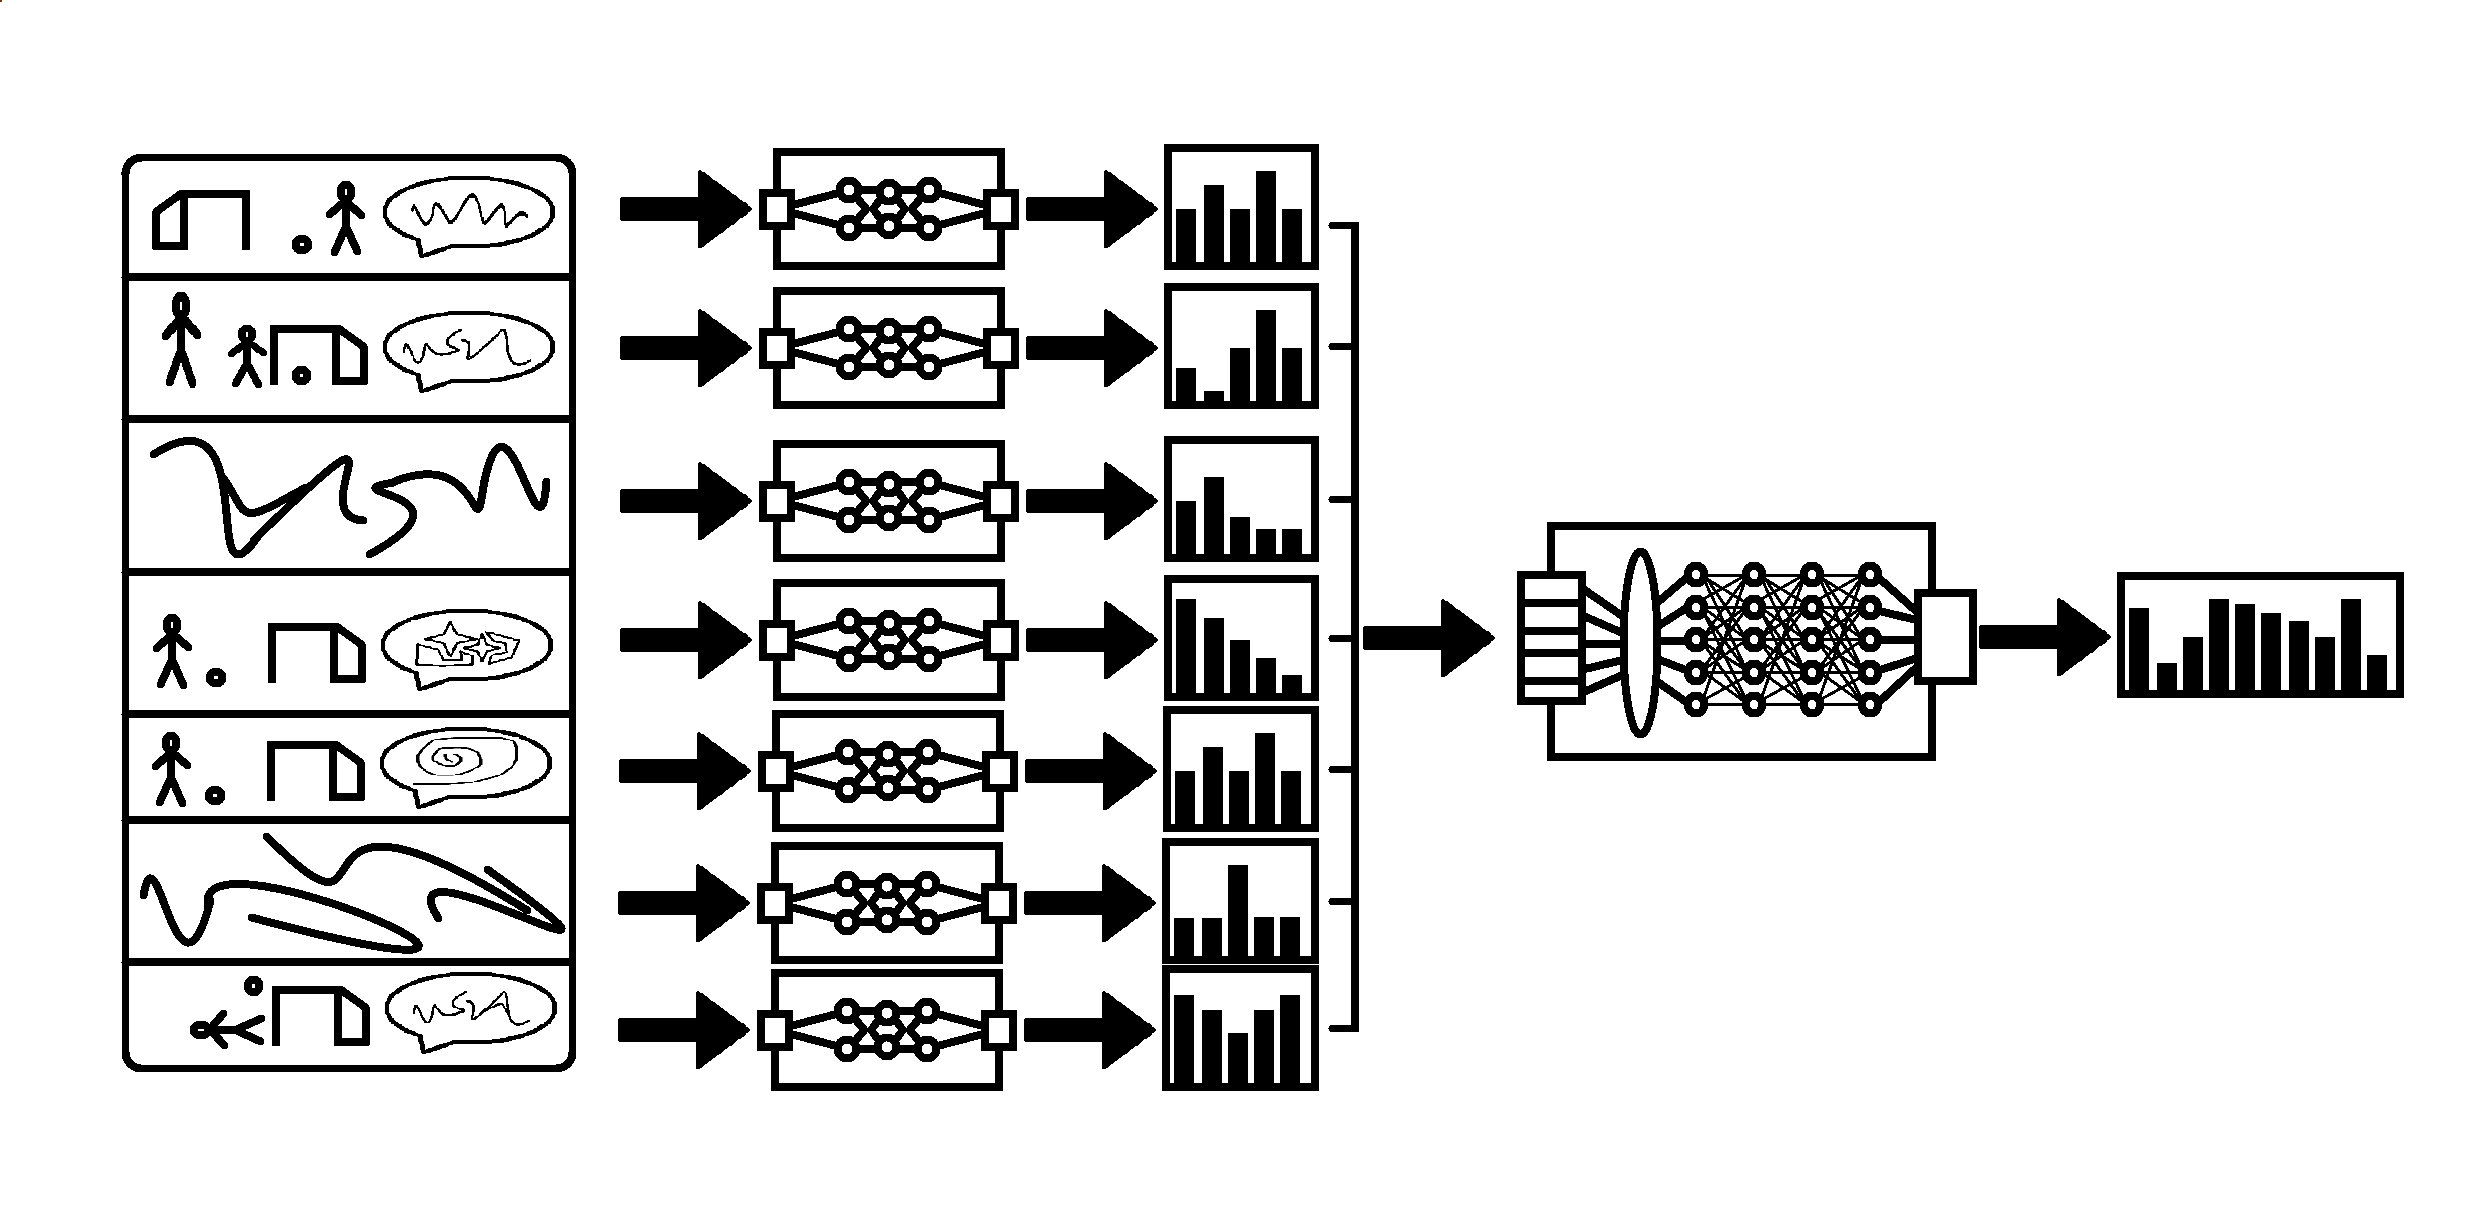

# 4 Concept <a name="concept"></a>
In this chapter we examine the actual system used in _A Hierarchical Model for Data-to-Text Generation_ [[5]](#main). 
Our main goal is to structurally improve the encoding process by taking into account information that can be gained from the format that the data is in. Our dataset consists of a collection of match statistics with an associated match description each. The match statistics are called data structures and each contain a number of entities, the teams or players with their associated statistics. The single statistics inside of an entity are called records, each record is a key value pair. The key describes what this statistic is about, for example player assists, the value can be a string (for player or city names), but is mostly a single number.
Traditionally, such tasks are turned into a simple sequence to sequence problem, by concatenating all data into one long sequence, which means that the information inherent in the hierachical data structure is lost, while unnecessary information, the arbitrary order of the elements, is added.

## 4.1 Dataset Notations
The dataset consists of statistics for different NBA matches with one description each.
The statistics of a single match are grouped as one data structure.
Each data structure has a number of entities, players or teams with their associated individual statistics.
Each of these entities is has a number of records, one record is a key value pair of what the statistic is (e.g. assists) and the value is simply the corresponding number.


## 4.2 Overview
The new system proposed by Clément Rebuffel et al. [[5]](#main), similar to the previously mentioned other hierarchical encoders, also encodes the data on two levels, but uses the previously presented transformers instead of traditional RNNs.
In practice, instead of concatenating the whole NBA match statistics input into one long sequence that is arbitrarily ordered, they first encode the collected statistics individually per player or team, before passing the encoded entities. This way, the inherent structure of the data format is respected directly through the encoding setup and does not need to be learned from scratch by the model, while wasting neurononal capacity [[18]](#neuronalCapacity) and training time. Additionally, a hierarchical attention mechanism can help the decoder decide about the importance of each data entry.

## 4.3  Hierarchical Encoding Model
### Record embedding
The first step for our raw records is the record embedding layer, keys and values are embedded as fixed size vectors. As already done in [[7]](#Data2Document), first key and value alone respectively, then as "a linear projection on the concatenation \[of the two,\] followed by a non linearity"[[page 6, 5]](#main), to create a combined record embedding, of dimension 600 in practice.
### Low-level encoder
We then run the low-level encoder, or transformer, once for each entity, each time hiding all other entity records from the available encoding context. During this process, as much information as possible migrates to the special first record of each entity, which is designated as the entity token that is passed upwards. 
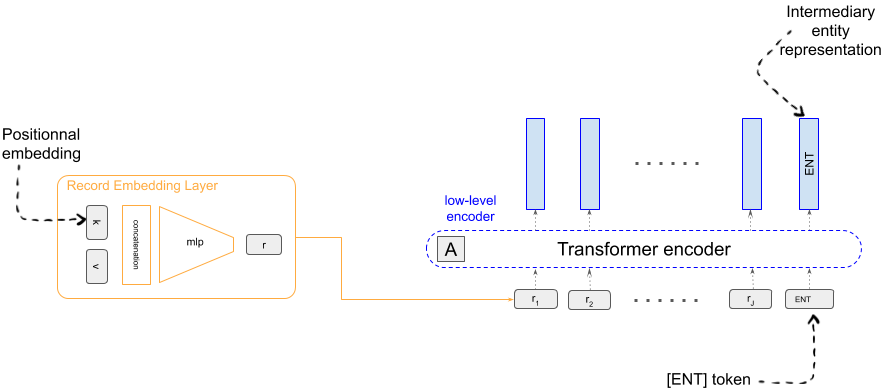 [[5]](#main)

### High-level encoder
The encoded entities are passed to the high-level encoder, another transformer that uses the context of all encoded entities to create a final encoded representation of the whole data structure. This datastructure, in combination with the hierarchical attention can then be passed to the decoder to create the output description.

## 4.4 Hierarchical attention
As previously done in [[22]](#entityModeling), we want to compute a dynamic context for our decoder to pay attention only to the most relevant records. We can again make use of a two-tiered structure to create the attention distributions.
We create two sets of attention scores based on the records alone, and whole entities respectively.
The scores created for a whole entity and its records is called the alpha score and all alpha scores are normalized over the whole data structure to sum up to one, creating a distribution of attention over all entities.
The attention of records alone are named beta scores and are also normalized to form a distribution inside each entity. 
There are two types of beta attention generation proposed by Rebuffel et al. [[5]](#main). 
First, the traditional hierarchical attention [[22]](#entityModeling) where record attention is assigned based on the key and their value to find the most relevant records of a mentioned player, secondly, key-guided hierarchical attention which does not use the actual values, but rather computes the attention score on the type of key and the hidden state of the decoder alone, hypothesizing that "when
deciding to mention a player, all experts automatically report his score without
consideration of its specific value" [[page 6, 5]](#main).

The total dynamic context is then computed as a simple alpha times beta score for each record with its respective entity, which the conventional LSTM decoder will use in combination with the encoded data structure to create an appropriate description.










# 5 Experimental Setup <a name="experiment"></a>

In the following section we will setup the whole code executeable in e.g. Google Colab. The edited code can be found at https://github.com/Kjelll/Hierachical-Model-for-Data-to-Text-Generation based on https://github.com/KaijuML/data-to-text-hierarchical.

The first step is to clone the repository which contains the codebase and the altered encoder and decoder mechanisms of Open-NMT in Python.

In [1]:
!git clone https://github.com/Kjelll/Hierachical-Model-for-Data-to-Text-Generation.git

Cloning into 'Hierachical-Model-for-Data-to-Text-Generation'...
Updating files:   9% (26/274)
Updating files:  10% (28/274)
Updating files:  11% (31/274)
Updating files:  12% (33/274)
Updating files:  13% (36/274)
Updating files:  14% (39/274)
Updating files:  15% (42/274)
Updating files:  16% (44/274)
Updating files:  17% (47/274)
Updating files:  18% (50/274)
Updating files:  19% (53/274)
Updating files:  20% (55/274)
Updating files:  21% (58/274)
Updating files:  22% (61/274)
Updating files:  23% (64/274)
Updating files:  24% (66/274)
Updating files:  25% (69/274)
Updating files:  26% (72/274)
Updating files:  27% (74/274)
Updating files:  28% (77/274)
Updating files:  29% (80/274)
Updating files:  30% (83/274)
Updating files:  31% (85/274)
Updating files:  32% (88/274)
Updating files:  33% (91/274)
Updating files:  34% (94/274)
Updating files:  35% (96/274)
Updating files:  36% (99/274)
Updating files:  37% (102/274)
Updating files:  38% (105/274)
Updating files:  39% (107/274)
Upd

In the next step we will gather the Rotowire dataset JSON from the originial harvard git repo, decompress it and add it into the corresponding folder. We also call the make-dataset.py which generates txt-files from the JSON-files.

In [2]:
%cd /content/Hierachical-Model-for-Data-to-Text-Generation/ 
%cd data
!wget https://github.com/harvardnlp/boxscore-data/raw/master/rotowire.tar.bz2
!tar -xvjf rotowire.tar.bz2
%cd /content/Hierachical-Model-for-Data-to-Text-Generation/
! python /content/Hierachical-Model-for-Data-to-Text-Generation/data/make-dataset.py --folder data

[WinError 3] Das System kann den angegebenen Pfad nicht finden: '/content/NLPPaper/'
C:\Users\qi11726\Desktop\Things\python\Hierachical-Model-for-Data-to-Text-Generation
C:\Users\qi11726\Desktop\Things\python\Hierachical-Model-for-Data-to-Text-Generation\data


Der Befehl "wget" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


[WinError 3] Das System kann den angegebenen Pfad nicht finden: '/content/NLPPaper/'
C:\Users\qi11726\Desktop\Things\python\Hierachical-Model-for-Data-to-Text-Generation\data


tar (child): rotowire.tar.bz2: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now
python: can't open file '/content/NLPPaper/data/make-dataset.py': [Errno 2] No such file or directory


In the next step we will install the nessecary libaries in specific version for the support of the open-NMT framework. The Pytorch version 1.1.0 is important to make sure "weakmodule" can be used, which became deprecated in later versions.

In [3]:
! pip install torch==1.1.0 torchvision==0.3.0
! pip install torchtext
! pip install ConfigArgParse

ERROR: Could not find a version that satisfies the requirement torch==1.1.0 (from versions: 0.1.2, 0.1.2.post1, 0.1.2.post2)
ERROR: No matching distribution found for torch==1.1.0


In the following step the Rotowire dataset will be preprocessed to ensure that the training can proceed as planned.

In [4]:
! python /content/Hierachical-Model-for-Data-to-Text-Generation/preprocess.py --config preprocess.cfg

python: can't open file '/content/Hierachical-Model-for-Data-to-Text-Generation/preprocess.py': [Errno 2] No such file or directory


Now we will train according to the config file which replaces adding commands in the command line directly with better documentation which heightens the readability and the ability to alter the config data as wished e.G. how many and which GPU cores are to be used or if no GPU is available, even the CPU.

In [5]:
! python /content/Hierachical-Model-for-Data-to-Text-Generation/train.py --config /content/Hierachical-Model-for-Data-to-Text-Generation/train.cfg

python: can't open file '/content/Hierachical-Model-for-Data-to-Text-Generation/train.py': [Errno 2] No such file or directory


After successfull training in the earlier set limits we can average the resulting checkpoints - in our case of the test files in the exp-1 folder we only have one checkpoint to average. This creates a checkpoint ensemble, which can create an ensemble method with a single training process [[21]](#checkPointEnsemble).

In [ ]:
python /content/Hierachical-Model-for-Data-to-Text-Generation/average-checkpoints.py --folder exp-1 --steps 100

As a final step we will use our model to translate the data e.G. decode it so we can see how well our training has worked. As with the training we have a config file which gives us the ability to deal with the data exactly as we want to.

In [ ]:
!python /content/Hierachical-Model-for-Data-to-Text-Generation/translate.py --config /content/Hierachical-Model-for-Data-to-Text-Generation/translate.cfg

# 6 Conclusion <a name="results"></a>
In evaluations on BLEU score and a more refined system to analyse generated content pioneered in [[7]](#Data2Document) by measuring different metrics for Relation Generation, Content Selection and Content Ordering.
Overall, it is mostly a clear improvement over other papers dealing with the rotowire dataset to create match descriptions.
Best in BLEU score and Content Selection, it outperforms papers in the main metric, but not in Relation Generation and Content Ordering, where it ends up with similar scores to most others.
Interestingly, in BLEU and CS categories, the simpler, Key-Guided Hierarchical Attention marginally won over the variant using traditional hierarchical attention, most likely proving the hypothesis right that once a player was chosen to be mentioned, the same statistics regarding him are relevant everytime.
However, it should also be noted that there is still a number of misplaced, false statements sneaking in the generated descriptions, especially for statistics regarding meta-game information, which is not in any way contained in the data structures, but does make its way into descriptions by professionals. For example, the training texts often refer to scheduled games of the participating teams, who and where they will play their next match.


# 7 Outlook <a name="conclusion"></a>
The text cannot relate to any meta context of player or team history unless the historic data about all teams would also be fed into the algorithm, for example “Team A played against team B today and just like their finale of championship xyz in 1997 they dragged the final score out to the last minute, providing tension and entertainment throughout.“
Meta-information about the teams/players could also be chosen with an attention algorithm to provide the model with the most relevant data about the history of mentioned players/teams, scheduled future matches and more, which was for example taken into account in some of the more authored very early approaches[[23]](#oldNLG).
Rebuffel et al. note that a more constrained model could provide less inaccurate descriptions [[5]](#main). Additionally, improved decoder systems could be combined with the hierarchical encoder to form an overall improved encoder decoder. 

# References <a name="references"></a>


 1. https://www.cs.bham.ac.uk/~pjh/sem1a5/pt1/pt1_history.html <a name="historyOfNLP"></a>
 2. https://www.gartner.com/smarterwithgartner/nueral-networks-and-modern-bi-platforms-will-evolve-data-and-analytics/ <a name="gartner"></a>
 3. https://www.rotowire.com/ <a name="rotowire"></a>
 4. Liu, Tianyu, Fuli Luo, Qiaolin Xia, Shuming Ma, Baobao Chang, and Zhifang Sui. "Hierarchical encoder with auxiliary supervision for neural table-to-text generation: Learning better representation for tables." In Proceedings of the AAAI Conference on Artificial Intelligence, vol. 33, pp. 6786-6793. 2019. url: https://aaai.org/ojs/index.php/AAAI/article/view/4653 <a name="hierarchical2019"></a>
 5. Rebuffel, Clément, Laure Soulier, Geoffrey Scoutheeten, and Patrick Gallinari. "A Hierarchical Model for Data-to-Text Generation." In European Conference on Information Retrieval, pp. 65-80. Springer, Cham, 2020. url: https://arxiv.org/pdf/1912.10011v1.pdf <a name="main"></a>
 6. Bahdanau, Dzmitry, Kyunghyun Cho, and Yoshua Bengio. "Neural machine translation by jointly learning to align and translate." arXiv preprint arXiv:1409.0473 (2014). url: https://arxiv.org/abs/1409.0473 <a name="align2014"></a>
 7. Wiseman, Sam, Stuart M. Shieber, and Alexander M. Rush. "Challenges in data-to-document generation." arXiv preprint arXiv:1707.08052 (2017). url: https://www.aclweb.org/anthology/D17-1239.pdf <a name="Data2Document"></a>
 8. Puduppully, Ratish, Li Dong, and Mirella Lapata. "Data-to-text generation with content selection and planning." In Proceedings of the AAAI Conference on Artificial Intelligence, vol. 33, pp. 6908-6915. 2019. url: https://arxiv.org/abs/1809.00582 <a name="SelectionAndPlanning"></a>
 9. https://paperswithcode.com/sota/data-to-text-generation-on-rotowire-relation <a name="d2tRotowire"></a>
 10. Lebret, Rémi, David Grangier, and Michael Auli. "Neural text generation from structured data with application to the biography domain." arXiv preprint arXiv:1603.07771 (2016). url: https://arxiv.org/pdf/1603.07771v3.pdf <a name="structuredData2016"></a>
 11. https://paperswithcode.com/sota/data-to-text-generation-on-webnlg <a name="d2tWebNLG"></a>
 12. Gulcehre, Caglar, Sungjin Ahn, Ramesh Nallapati, Bowen Zhou, and Yoshua Bengio. "Pointing the unknown words." arXiv preprint arXiv:1603.08148 (2016). url: https://arxiv.org/pdf/1603.08148.pdf <a name="pointing"></a>
 13. https://developpaper.com/decomposing-transformer-series-i-detailed-explanation-of-encoder-decoder-model-architecture/ <a name="transformerExplanation"></a>
 14. Helfrich, Kyle, and Qiang Ye. "Eigenvalue Normalized Recurrent Neural Networks for Short Term Memory." arXiv preprint arXiv:1911.07964 (2019). url: https://arxiv.org/pdf/1911.07964.pdf <a name="eigenvalue"></a>
 15. https://towardsdatascience.com/the-vanishing-gradient-problem-69bf08b15484 <a name="vanishingGradients"></a>
 16. Yang, Zichao, Diyi Yang, Chris Dyer, Xiaodong He, Alex Smola, and Eduard Hovy. "Hierarchical attention networks for document classification." In Proceedings of the 2016 conference of the North American chapter of the association for computational linguistics: human language technologies, pp. 1480-1489. 2016. url: https://www.microsoft.com/en-us/research/publication/hierarchical-attention-networks-document-classification/<a name="hierarchicalAttentionClassification"></a>
 17.  Vaswani, Ashish, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Łukasz Kaiser, and Illia Polosukhin. "Attention is all you need." In Advances in neural information processing systems, pp. 5998-6008. 2017. url: https://arxiv.org/abs/1706.03762 <a name="attention2017"></a>
 18. Baldi, Pierre, and Roman Vershynin. "On neuronal capacity." In Advances in Neural Information Processing Systems, pp. 7729-7738. 2018. url: https://www.math.uci.edu/~rvershyn/papers/bv-JSM.pdf <a name="neuronalCapacity"></a>
 19. Serban, Iulian Vlad, Alessandro Sordoni, Ryan Lowe, Laurent Charlin, Joelle Pineau, Aaron Courville, and Yoshua Bengio. "A hierarchical latent variable encoder-decoder model for generating dialogues." In Thirty-First AAAI Conference on Artificial Intelligence. 2017. url: https://www.aaai.org/ocs/index.php/AAAI/AAAI17/paper/view/14567/14219 <a name="HierarchicalLatent "></a>
 20. Luong, Minh-Thang, Hieu Pham, and Christopher D. Manning. "Effective approaches to attention-based neural machine translation." arXiv preprint arXiv:1508.04025 (2015). url: https://arxiv.org/pdf/1508.04025.pdf <a name="nmtAttention"></a> 
 21. Chen, Hugh, Scott Lundberg, and Su-In Lee. "Checkpoint ensembles: Ensemble methods from a single training process." arXiv preprint arXiv:1710.03282 (2017). url: https://arxiv.org/pdf/1710.03282.pdf <a name="checkPointEnsemble"></a>
 22. Puduppully, Ratish, Li Dong, and Mirella Lapata. "Data-to-text generation with entity modeling." arXiv preprint arXiv:1906.03221 (2019). url: https://arxiv.org/pdf/1906.03221.pdf <a name="entityModeling"></a>
 23. Robin, Jacques. "Revision-based generation of natural language summaries providing historical background: corpus-based analysis, design, implementation and evaluation." (1994). <a name="oldNLG"></a>
 2. [ ] <a name="placeholder"></a>
 2. [ ] <a name="placeholder"></a>
 2. [ ] <a name="placeholder"></a>
 2. [ ] <a name="placeholder"></a>
 2. [ ] <a name="placeholder"></a>
 111. Elbayad, Maha, Laurent Besacier, and Jakob Verbeek. "Pervasive attention: 2d convolutional neural networks for sequence-to-sequence prediction." arXiv preprint arXiv:1808.03867 (2018). url: https://arxiv.org/abs/1808.03867 <a name="pervasive2018"></a>